# 1-D Objective Functions

In [1]:
from pathlib import Path
import sys

import torch

sys.path.insert(0, "/Users/williamjenkins/Research/Projects/BOGP/Source")
from BOGP.optimization.optimizer import Optimizer, OptimizerConfig
from BOGP.optimization.plotting import ResultsPlotter

DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
DATA_FOLDER = Path("../../Data/Demos/1D/")
SEED = 2009
N_WARMUP = 3
N_TOTAL = 50

import gpytorch
print(gpytorch.__version__)

1.8.1


## Objective Function: Rastrigin

In [2]:
from botorch.test_functions import Rastrigin

DIM = 1
obj_func_kwargs = {"dim": DIM, "negate": True}
obj_func = Rastrigin(**obj_func_kwargs)
search_parameters = [{"name": "x1", "bounds": [-5.12, 5.12]}]
X_test = torch.linspace(
    search_parameters[0]["bounds"][0], search_parameters[0]["bounds"][1], 1001
).unsqueeze(1)

### Case 1: Expected Improvement

In [22]:
from botorch.acquisition.analytic import ExpectedImprovement
from gpytorch.kernels import CosineKernel, PeriodicKernel, ScaleKernel, RBFKernel
from gpytorch.priors import NormalPrior, GammaPrior

# covar_module = ScaleKernel(
#     CosineKernel(period_length_prior=NormalPrior(0.5, 0.25))
# )
# covar_module = ScaleKernel(
#     PeriodicKernel(period_length_prior=NormalPrior(0.5, 0.25))
# )
# covar_module = ScaleKernel(RBFKernel(lengthscale_prior=GammaPrior()))
covar_module = None

config_ei = OptimizerConfig(
    kernel_func=covar_module,
    acq_func=ExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_ei = Optimizer(
    config_ei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)


In [23]:
results_ei = optimizer_ei.run()
optimizer_ei.save(DATA_FOLDER / "1D_RASTRIGIN_EI_optim.pth")
results_ei.save(DATA_FOLDER / "1D_RASTRIGIN_EI_results.pth")

# optim_config = torch.load(DATA_FOLDER / "1D_RASTRIGIN_EI_optim.pth")
# results = Results().load(DATA_FOLDER / "1D_RASTRIGIN_EI_results.pth")
# optim_config

Optimizing: 100%|████████████████████| 47/47 [00:07<00:00,  6.23 eval/s]


torch.Size([1001, 1])
torch.Size([1001, 1])


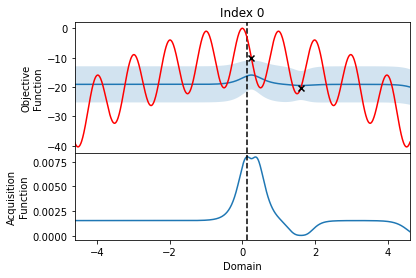

torch.Size([1001, 1])
torch.Size([1001, 1])


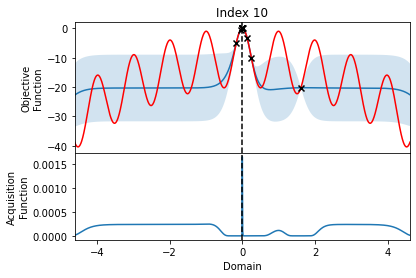

torch.Size([1001, 1])
torch.Size([1001, 1])


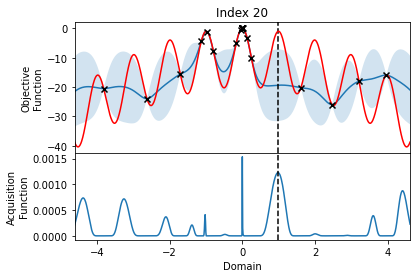

torch.Size([1001, 1])
torch.Size([1001, 1])


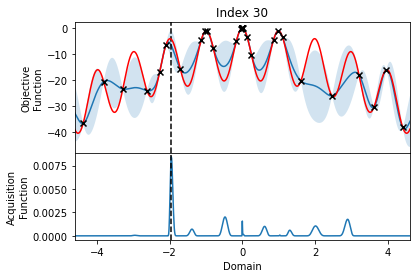

torch.Size([1001, 1])
torch.Size([1001, 1])


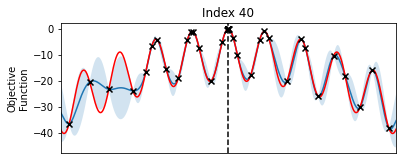

In [26]:
pltr_ei = ResultsPlotter(optimizer_ei._construct_dict(), results_ei)
parameters_to_plot = ["x1"]
pltr_ei.plot_training_iterations(X_test, parameters_to_plot, index=[0, 10, 20, 30, 40])

### Case 2: Probability of Improvement

In [5]:
from botorch.acquisition.analytic import ProbabilityOfImprovement

config_pi = OptimizerConfig(
    ProbabilityOfImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_pi = Optimizer(
    config_pi,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_pi = optimizer_pi.run()
optimizer_pi.save(DATA_FOLDER / "1D_RASTRIGIN_PI_optim.pth")
results_pi.save(DATA_FOLDER / "1D_RASTRIGIN_PI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:06<00:00,  7.26 eval/s]


Plotting 1-D


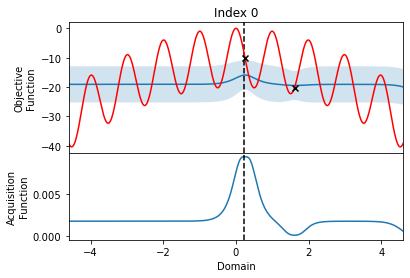

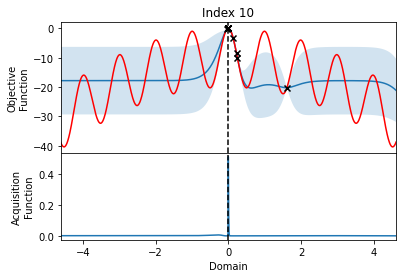

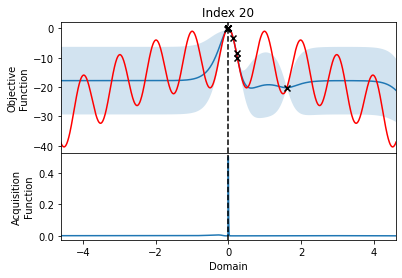

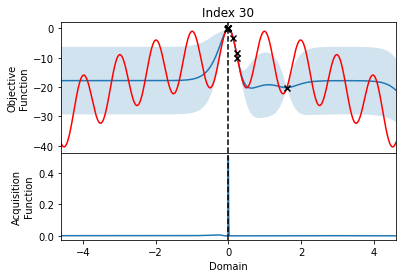

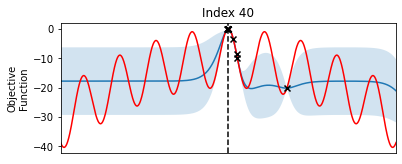

In [6]:
pltr_pi = ResultsPlotter(optimizer_pi._construct_dict(), results_pi)
parameters_to_plot = ["x1"]
pltr_pi.plot_training_iterations(
    parameters_to_plot=parameters_to_plot, X_test=X_test, index=[0, 10, 20, 30, 40]
)

### Case 3: q-Expected Improvement

In [7]:
from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler

config_qei = OptimizerConfig(
    qExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
    q=3,
    sampler=SobolQMCNormalSampler,
    sampler_kwargs={"num_samples": 256},
)
optimizer_qei = Optimizer(
    config_qei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_qei = optimizer_qei.run()
optimizer_qei.save(DATA_FOLDER / "1D_RASTRIGIN_qEI_optim.pth")
results_qei.save(DATA_FOLDER / "1D_RASTRIGIN_qEI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:08<00:00,  5.64 eval/s]


Plotting 1-D


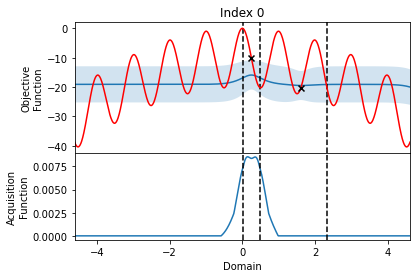

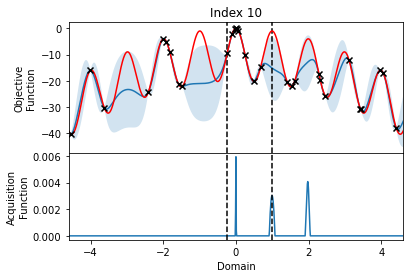

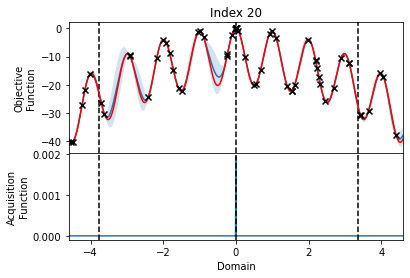

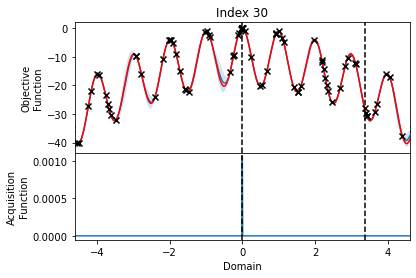

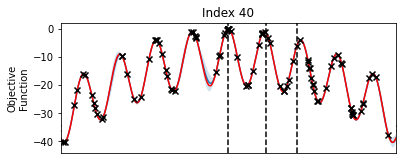

In [8]:
pltr_qei = ResultsPlotter(optimizer_qei._construct_dict(), results_qei)
parameters_to_plot = ["x1"]
pltr_qei.plot_training_iterations(
    parameters_to_plot=parameters_to_plot, X_test=X_test, index=[0, 10, 20, 30, 40]
)

## Objective Function: Levy

In [9]:
from botorch.test_functions import Levy

DIM = 1
obj_func_kwargs = {"dim": DIM, "negate": True}
obj_func = Levy(**obj_func_kwargs)
search_parameters = [{"name": "x1", "bounds": [-10.0, 10.0]}]
X_test = torch.linspace(
    search_parameters[0]["bounds"][0], search_parameters[0]["bounds"][1], 1001
).unsqueeze(-1)

### Case 1: Expected Improvement

In [10]:
from botorch.acquisition.analytic import ExpectedImprovement

config_ei = OptimizerConfig(
    ExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_ei = Optimizer(
    config_ei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_ei = optimizer_ei.run()
optimizer_ei.save(DATA_FOLDER / "1D_LEVY_EI_optim.pth")
results_ei.save(DATA_FOLDER / "1D_LEVY_EI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:08<00:00,  5.24 eval/s]


Plotting 1-D


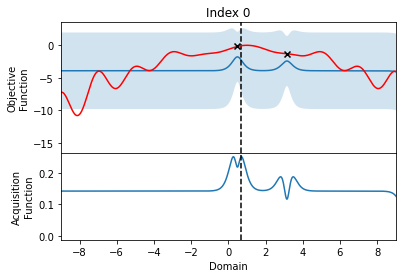

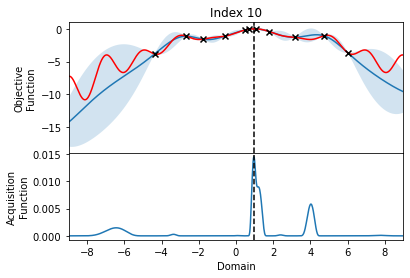

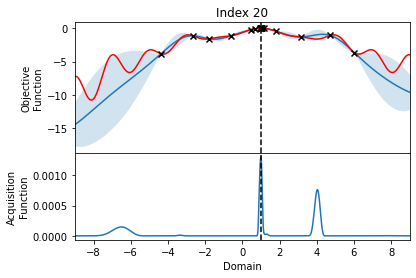

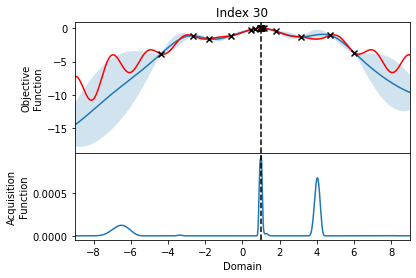

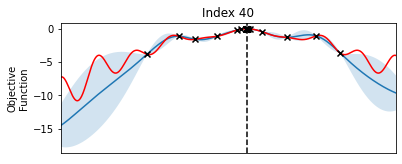

In [11]:
pltr_ei = ResultsPlotter(optimizer_ei._construct_dict(), results_ei)
parameters_to_plot = ["x1"]
pltr_ei.plot_training_iterations(
    parameters_to_plot=parameters_to_plot, X_test=X_test, index=[0, 10, 20, 30, 40]
)

### Case 2: Probability of Improvement

In [12]:
from botorch.acquisition.analytic import ProbabilityOfImprovement

config_pi = OptimizerConfig(
    ProbabilityOfImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
)
optimizer_pi = Optimizer(
    config_pi,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_pi = optimizer_pi.run()
optimizer_pi.save(DATA_FOLDER / "1D_RASTRIGIN_PI_optim.pth")
results_pi.save(DATA_FOLDER / "1D_RASTRIGIN_PI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:23<00:00,  1.99 eval/s]


Plotting 1-D


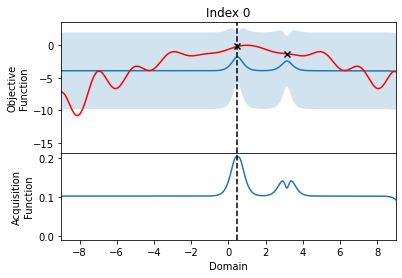

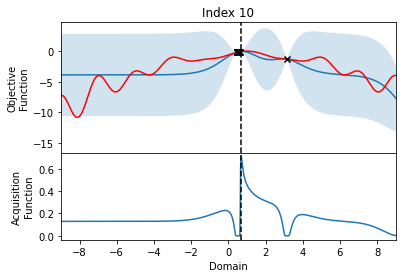

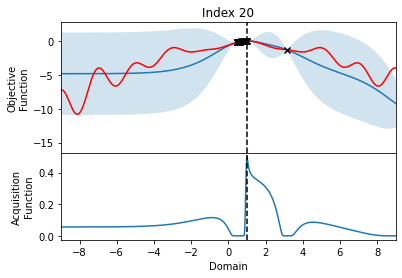

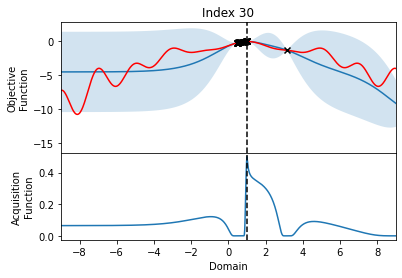

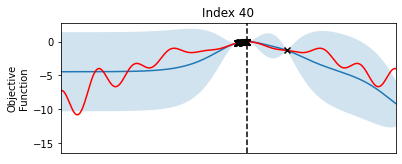

In [13]:
pltr_pi = ResultsPlotter(optimizer_pi._construct_dict(), results_pi)
parameters_to_plot = ["x1"]
pltr_pi.plot_training_iterations(
    parameters_to_plot=parameters_to_plot, X_test=X_test, index=[0, 10, 20, 30, 40]
)

### Case 3: q-Expected Improvement

In [14]:
from botorch.acquisition.monte_carlo import qExpectedImprovement
from botorch.sampling.samplers import SobolQMCNormalSampler

config_qei = OptimizerConfig(
    qExpectedImprovement,
    acq_func_kwargs={"num_samples": 256},
    n_warmup=N_WARMUP,
    n_total=N_TOTAL,
    q=3,
    sampler=SobolQMCNormalSampler,
    sampler_kwargs={"num_samples": 256},
)
optimizer_qei = Optimizer(
    config_qei,
    obj_func,
    search_parameters,
    obj_func_kwargs=obj_func_kwargs,
    device=DEVICE,
    seed=SEED,
)
results_qei = optimizer_qei.run()
optimizer_qei.save(DATA_FOLDER / "1D_RASTRIGIN_qEI_optim.pth")
results_qei.save(DATA_FOLDER / "1D_RASTRIGIN_qEI_results.pth")

Optimizing: 100%|████████████████████| 47/47 [00:08<00:00,  5.36 eval/s]


Plotting 1-D


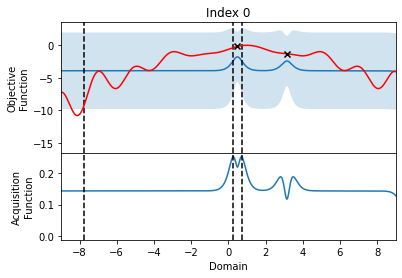

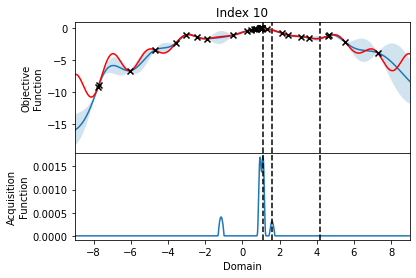

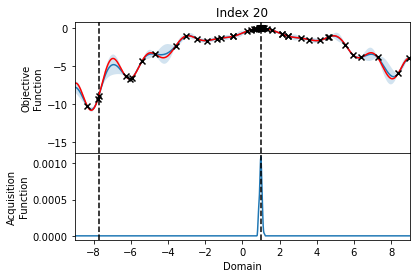

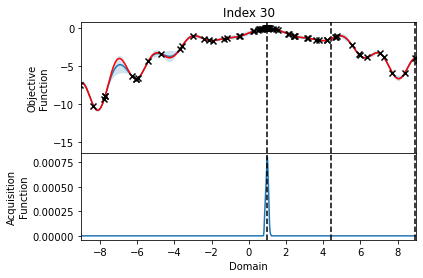

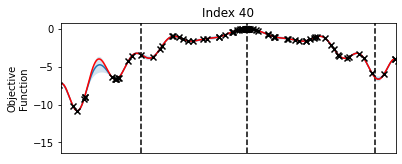

In [15]:
pltr_qei = ResultsPlotter(optimizer_qei._construct_dict(), results_qei)
parameters_to_plot = ["x1"]
pltr_qei.plot_training_iterations(
    parameters_to_plot=parameters_to_plot, X_test=X_test, index=[0, 10, 20, 30, 40]
)